# Top Neighborhoods for Registry + General Funds Matching

In [1]:
import pandas as pd
import mwdsbe
import schuylkill as skool
import time
import geopandas as gpd

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

## Data
* registry
* general funds
* matches: matching between registry and general funds
* full_matches: full funds per vendor

In [3]:
registry = mwdsbe.load_registry() # geopandas df
gf = pd.read_excel(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\mwdsbe\data\cwedp_37_report.xlsx', sheet_name='general_funds')
# gf = pd.read_excel('/Users/dabinlee/Documents/github/MWDSBE/mwdsbe/data/cwedp_37_report.xlsx', sheet_name='general_funds')

In [4]:
# filter general funds data
gf = gf.loc[gf['MAJ_CLASS'] != 1]
gf = gf.loc[gf['VEND_NAME'].dropna().index]

In [5]:
# clean data
ignore_words = ['inc', 'group', 'llc', 'corp', 'pc', 'incorporated', 'ltd', 'co', 'associates', 'services', 'company', 'enterprises', 'enterprise', 'service', 'corporation']
cleaned_registry = skool.clean_strings(registry, ['company_name', 'dba_name'], True, ignore_words)
cleaned_gf = skool.clean_strings(gf, ['VEND_NAME'], True, ignore_words)

cleaned_registry = cleaned_registry.dropna(subset=['company_name'])
cleaned_gf = cleaned_gf.dropna(subset=['VEND_NAME'])

In [6]:
matches = pd.read_excel(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\analysis\data\general_funds\fuzz95_tfidf80.xlsx')
# matches = pd.read_excel('/Users/dabinlee/Documents/github/MWDSBE/analysis/data/general_funds/fuzz95_tfidf913.xlsx')

In [7]:
matches.rename(columns={'Unnamed: 0': 'left_index'}, inplace=True)
matches.set_index('left_index', inplace=True)

In [8]:
# Manually remove 14 wrong matches
wrong_matches = ['a g consulting engineering', 'amercom consulting engineers', 'awk consulting engineers', 
                 'briones consulting engineering', 'dy consulting engineer p c', 'environmental management',
                 'events unlimited', 'hill environmental', 'kma consulting engineers', 'milligan and', 
                 'ms technologies', 'specialists', 'site contractors', 'stell environmental']

In [9]:
matches = matches.loc[matches['company_name'].apply(lambda x : x not in wrong_matches)]

In [10]:
len(matches)

136

In [11]:
unique_vendors = matches['VEND_NAME'].tolist()

In [12]:
full_matches = cleaned_gf.loc[cleaned_gf['VEND_NAME'].apply(lambda x : x in unique_vendors)]

In [13]:
len(full_matches['VEND_NAME'].unique())

135

In [14]:
# why one vendor has not found?
set1 = set(unique_vendors)
set2 = set(full_matches['VEND_NAME'].unique())
diff = set1.difference(set2)

In [15]:
diff

set()

In [14]:
full_matches

,DR_ACCT,CR_ACCT,CURR_PRIOR_FLAG,POSTED_DATE,DEPT,SEC_FD,INDEX,PROGRAM_CD,MAJ_CLASS,CLASS,DOC_NUM,TRANS_DESC,DOC_REF_NUM,VEND_NAME,VEND_NUM,AMT,DOC_NUM4,DOC_REF4
76494,433,201,PRIOR,2018-07-05,1,10,10058,NaN,2,0258,VCXX1900008101,*JUN34828S* CRT RPRTING SVS-6/18,POXX1812349101,strehlow,233036541 01,11125.54,VCXX,POXX
76510,433,201,PRIOR,2018-07-19,1,10,10058,NaN,2,0258,VCXX1900408101,*JUL35226S* CRT RPRTING SVS-6/18,POXX1812349101,strehlow,233036541 01,3273.93,VCXX,POXX
76511,433,201,PRIOR,2018-07-19,1,10,10058,NaN,2,0258,VCXX1900383201,*MAY34385S* CRT RPRTING SVS-4/18&...,POXX1812349101,strehlow,233036541 01,18024.30,VCXX,POXX
76694,431,201,CURR,2018-08-10,1,10,10058,NaN,2,0258,VCXX1901049401,*JUL35228S* CRT RRT WAIT TIME-6/18,POXX1910295101,strehlow,233036541 01,70.00,VCXX,POXX
76695,431,201,CURR,2018-08-13,1,10,10058,NaN,2,0258,VCXX1901062201,*JUL35391S* CRT RPRTING SVS-7/18,POXX1910293901,strehlow,233036541 01,587.10,VCXX,POXX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317129,433,201,PRIOR,2018-07-27,23,10,230073,NaN,4,0427,VCXX1900606001,*B08480763* B08480763/EQUIP/06/18,POXX1812162501,shi international,223009648 01,21700.00,VCXX,POXX
317142,431,201,CURR,2019-06-27,22,10,226280,NaN,4,0427,VCXX1909362302,#B10002045# SCANNER,POXX1912118102,shi international,223009648 01,168.80,VCXX,POXX
317146,431,201,CURR,2019-06-18,22,10,226280,NaN,4,0427,VCXX1909085702,#B10068691# WEBCAM,POXX1912141802,shi international,223009648 01,166.00,VCXX,POXX
317156,433,201,PRIOR,2019-01-08,22,10,226280,NaN,4,0427,VCXX1903988102,#B08440820# ENDRUN,POXX1812335002,shi international,223009648 01,1785.53,VCXX,POXX


In [15]:
data = matches.merge(full_matches, how='right', on='VEND_NAME')

In [16]:
# do not use columns with _x
data

,company_name,dba_name,owner_first,owner_last,location,location_city,location_state,zip_code,mailing_address,mailing_city,...,PROGRAM_CD_y,MAJ_CLASS_y,CLASS_y,DOC_NUM_y,TRANS_DESC_y,DOC_REF_NUM_y,VEND_NUM_y,AMT_y,DOC_NUM4_y,DOC_REF4_y
0,4u,stellar,Liang,Chen,"70 West 36th Street, Ste. #702",New York,NY,10018,"70 West 36th Street, Ste. #702",New York,...,NaN,2,0250,PVMD1902159601,*1669* MAY19 DAO,MDXX1900001301,113189413 02,7420.00,PVMD,MDXX
1,4u,stellar,Liang,Chen,"70 West 36th Street, Ste. #702",New York,NY,10018,"70 West 36th Street, Ste. #702",New York,...,NaN,2,0250,PVMD1901949904,*BILL002235* DEC18,MDXX1900001301,113189413 02,7700.00,PVMD,MDXX
2,4u,stellar,Liang,Chen,"70 West 36th Street, Ste. #702",New York,NY,10018,"70 West 36th Street, Ste. #702",New York,...,NaN,2,0250,PVMD1901949903,*BILL002070* OCT18,MDXX1900001301,113189413 02,4900.00,PVMD,MDXX
3,4u,stellar,Liang,Chen,"70 West 36th Street, Ste. #702",New York,NY,10018,"70 West 36th Street, Ste. #702",New York,...,NaN,2,0250,PVMD1901949902,*BILL001983* SEP18,MDXX1900001301,113189413 02,2660.00,PVMD,MDXX
4,4u,stellar,Liang,Chen,"70 West 36th Street, Ste. #702",New York,NY,10018,"70 West 36th Street, Ste. #702",New York,...,NaN,2,0250,PVMD1901949901,*BILL001736* JUN18,MDXX1900001301,113189413 02,11250.00,PVMD,MDXX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,zanaras reporting video,NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103,"1845 WALNUT STREET, Suite 938",Philadelphia,...,NaN,2,0258,PVXX1900215301,*55196* AUG18 REED V. SEPTA 16-2851-001,NaN,510620006 01,365.40,PVXX,NaN
5662,zanaras reporting video,NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103,"1845 WALNUT STREET, Suite 938",Philadelphia,...,NaN,2,0258,PVXX1900096101,*53849* MAR18 98523 STREETS CALZADO V. SEPTA,NaN,510620006 01,225.60,PVXX,NaN
5663,zanaras reporting video,NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103,"1845 WALNUT STREET, Suite 938",Philadelphia,...,NaN,2,0258,PVXX1900071801,*54850* JUL18 98724 STREETS ANDREWS V. SEPTA,NaN,510620006 01,248.75,PVXX,NaN
5664,zanaras reporting video,NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103,"1845 WALNUT STREET, Suite 938",Philadelphia,...,NaN,2,0258,PVXX1900018601,*54513* MAY18 99242 STREETS JOHNSON V. CITY,NaN,510620006 01,481.95,PVXX,NaN


data has invalid geometry. Drop the existing geometry column and recreate it using lng and lat

In [19]:
data_geo = data.dropna(subset=['geometry'])

In [20]:
len(data_geo)

2720

In [21]:
# drop existing geometry and create a new one
data_geo.drop('geometry', axis=1, inplace=True)

C:\Users\dabinlee\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
data_geo['geometry'] = list(zip(data_geo['lng'], data_geo['lat']))

C:\Users\dabinlee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
from shapely.geometry import Point
data_geo['geometry'] = data_geo['geometry'].apply(Point)

C:\Users\dabinlee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
data_gdf = gpd.GeoDataFrame(data_geo, geometry='geometry', crs={"init": "epsg:4326"})

In [25]:
len(data_gdf)

2720

In [26]:
zillow = gpd.read_file('data/neighborhood/zillow_neighborhoods.geojson')
# zillow = zillow.to_crs(epsg=3857)

In [27]:
joined = gpd.sjoin(data_gdf, zillow, op='within', how='left')

In [28]:
len(joined)

2720

In [29]:
# joined with unique companies for exact number of vendors by neighborhoods
unique_joined = joined.drop_duplicates(subset=['VEND_NAME'])

In [30]:
len(unique_joined)

55

In [31]:
joined.columns

Index(['company_name', 'dba_name', 'owner_first', 'owner_last', 'location',
       'location_city', 'location_state', 'zip_code', 'mailing_address',
       'mailing_city', 'mailing_state', 'mailing_zip', 'certification_type',
       'capability', 'local', 'out_of_state', 'location_standard', 'lat',
       'lng', 'match_probability', 'right_index', 'DR_ACCT_x', 'CR_ACCT_x',
       'CURR_PRIOR_FLAG_x', 'POSTED_DATE_x', 'DEPT_x', 'SEC_FD_x', 'INDEX_x',
       'PROGRAM_CD_x', 'MAJ_CLASS_x', 'CLASS_x', 'DOC_NUM_x', 'TRANS_DESC_x',
       'DOC_REF_NUM_x', 'VEND_NAME', 'VEND_NUM_x', 'AMT_x', 'DOC_NUM4_x',
       'DOC_REF4_x', 'DR_ACCT_y', 'CR_ACCT_y', 'CURR_PRIOR_FLAG_y',
       'POSTED_DATE_y', 'DEPT_y', 'SEC_FD_y', 'INDEX_y', 'PROGRAM_CD_y',
       'MAJ_CLASS_y', 'CLASS_y', 'DOC_NUM_y', 'TRANS_DESC_y', 'DOC_REF_NUM_y',
       'VEND_NUM_y', 'AMT_y', 'DOC_NUM4_y', 'DOC_REF4_y', 'geometry',
       'index_right', 'ZillowName'],
      dtype='object')

In [32]:
total_amt = joined.groupby('ZillowName')['AMT_y'].sum()
total_amt = total_amt.to_frame('total_amt').reset_index()
total_amt.head()

,ZillowName,total_amt
0,Allegheny West,2416064.47
1,Callow Hill,76522.41
2,Cedarbrook,19318.10
3,Chestnut Hill,1300.00
4,East Passyunk,1230.00


In [33]:
total_n = unique_joined.groupby('ZillowName').size()
total_n = total_n.to_frame('total_n').reset_index()
total_n.head()

,ZillowName,total_n
0,Allegheny West,1
1,Callow Hill,1
2,Cedarbrook,1
3,Chestnut Hill,1
4,East Passyunk,1


In [34]:
joined.certification_type.unique()

array(['WBE', 'MBE', 'MWBE'], dtype=object)

In [35]:
total_cert = joined.groupby(['ZillowName', 'certification_type'])['AMT_y'].sum()
total_cert = total_cert.to_frame('amt_cert_type').reset_index()
total_cert.head()

,ZillowName,certification_type,amt_cert_type
0,Allegheny West,MBE,2416064.47
1,Callow Hill,MBE,76522.41
2,Cedarbrook,MBE,19318.10
3,Chestnut Hill,MWBE,1300.00
4,East Passyunk,MBE,1230.00


In [36]:
total_mbe_amt = total_cert.loc[total_cert['certification_type'] == 'MBE']
total_mbe_amt.drop('certification_type', axis=1, inplace=True)
total_mbe_amt.rename(columns={'amt_cert_type': 'mbe_amt'}, inplace=True)

C:\Users\dabinlee\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\dabinlee\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [37]:
total_mbe_amt.head()

,ZillowName,mbe_amt
0,Allegheny West,2416064.47
1,Callow Hill,76522.41
2,Cedarbrook,19318.10
4,East Passyunk,1230.00
8,Holmesburg,1081458.06


In [38]:
total_wbe_amt = total_cert.loc[total_cert['certification_type'] == 'WBE']
total_wbe_amt.drop('certification_type', axis=1, inplace=True)
total_wbe_amt.rename(columns={'amt_cert_type': 'wbe_amt'}, inplace=True)

In [39]:
total_wbe_amt.head()

,ZillowName,wbe_amt
5,Fishtown,31528.00
7,Germantown West Central,1178.64
9,Holmesburg,150524.04
12,Logan Square,24772.57
16,Northeast Airport,28174.74


In [40]:
total_mwbe_amt = total_cert.loc[total_cert['certification_type'] == 'MWBE']
total_mwbe_amt.drop('certification_type', axis=1, inplace=True)
total_mwbe_amt.rename(columns={'amt_cert_type': 'mwbe_amt'}, inplace=True)

In [41]:
total_mwbe_amt.head()

,ZillowName,mwbe_amt
3,Chestnut Hill,1300.00
6,Germantown Southwest,895.83
10,Lawndale,1271.00
13,Mount Airy East,106607.00
14,Mount Airy West,104062.50


In [42]:
total_cert_n = unique_joined.groupby(['ZillowName', 'certification_type']).size()
total_cert_n = total_cert_n.to_frame('n_cert_type').reset_index()
total_cert_n.head()

,ZillowName,certification_type,n_cert_type
0,Allegheny West,MBE,1
1,Callow Hill,MBE,1
2,Cedarbrook,MBE,1
3,Chestnut Hill,MWBE,1
4,East Passyunk,MBE,1


In [43]:
total_mbe_n = total_cert_n.loc[total_cert_n['certification_type'] == 'MBE']
total_mbe_n.drop('certification_type', axis=1, inplace=True)
total_mbe_n.rename(columns={'n_cert_type': 'mbe_n'}, inplace=True)

In [44]:
total_mbe_n.head()

,ZillowName,mbe_n
0,Allegheny West,1
1,Callow Hill,1
2,Cedarbrook,1
4,East Passyunk,1
8,Holmesburg,1


In [45]:
total_wbe_n = total_cert_n.loc[total_cert_n['certification_type'] == 'WBE']
total_wbe_n.drop('certification_type', axis=1, inplace=True)
total_wbe_n.rename(columns={'n_cert_type': 'wbe_n'}, inplace=True)

In [46]:
total_wbe_n.head()

,ZillowName,wbe_n
5,Fishtown,1
7,Germantown West Central,1
9,Holmesburg,3
12,Logan Square,1
16,Northeast Airport,1


In [47]:
total_mwbe_n = total_cert_n.loc[total_cert_n['certification_type'] == 'MWBE']
total_mwbe_n.drop('certification_type', axis=1, inplace=True)
total_mwbe_n.rename(columns={'n_cert_type': 'mwbe_n'}, inplace=True)

In [48]:
total_mwbe_n.head()

,ZillowName,mwbe_n
3,Chestnut Hill,1
6,Germantown Southwest,1
10,Lawndale,1
13,Mount Airy East,1
14,Mount Airy West,1


In [49]:
totals = zillow.merge(total_amt, on='ZillowName', how='left')
totals = totals.merge(total_mbe_amt, on='ZillowName', how='left')
totals = totals.merge(total_wbe_amt, on='ZillowName', how='left')
totals = totals.merge(total_mwbe_amt, on='ZillowName', how='left')
totals = totals.merge(total_n, on='ZillowName', how='left')
totals = totals.merge(total_mbe_n, on='ZillowName', how='left')
totals = totals.merge(total_wbe_n, on='ZillowName', how='left')
totals = totals.merge(total_mwbe_n, on='ZillowName', how='left')

In [50]:
totals['total_amt'] = totals['total_amt'].fillna(0)
totals['mbe_amt'] = totals['mbe_amt'].fillna(0)
totals['wbe_amt'] = totals['wbe_amt'].fillna(0)
totals['mwbe_amt'] = totals['mwbe_amt'].fillna(0)
totals['total_n'] = totals['total_n'].fillna(0)
totals['mbe_n'] = totals['mbe_n'].fillna(0)
totals['wbe_n'] = totals['wbe_n'].fillna(0)
totals['mwbe_n'] = totals['mwbe_n'].fillna(0)

In [51]:
totals

,ZillowName,geometry,total_amt,mbe_amt,wbe_amt,mwbe_amt,total_n,mbe_n,wbe_n,mwbe_n
0,Academy Gardens,"POLYGON ((-74.99851 40.06435, -74.99456 40.061...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,Airport,"POLYGON ((-75.19728 39.89252, -75.19617 39.892...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,Allegheny West,"POLYGON ((-75.16592 40.00327, -75.16596 40.003...",2416064.47,2416064.47,0.0,0.0,1.0,1.0,0.0,0.0
3,Andorra,"POLYGON ((-75.22463 40.06686, -75.22588 40.065...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,Aston Woodbridge,"POLYGON ((-75.00860 40.05369, -75.00861 40.053...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
153,Wister,"POLYGON ((-75.17210 40.03840, -75.17197 40.037...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
154,Woodland Terrace,"POLYGON ((-75.20399 39.94968, -75.20396 39.949...",35655.11,35655.11,0.0,0.0,1.0,1.0,0.0,0.0
155,Wynnefield,"POLYGON ((-75.22070 40.00392, -75.21792 39.994...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
156,Wynnefield Heights,"POLYGON ((-75.20103 40.00419, -75.20410 40.000...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
totals.to_file(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\analysis\data\general_funds\totals_nhoods_136.geojson', driver='GeoJSON')
# totals.to_file('/Users/dabinlee/Documents/github/MWDSBE/analysis/data/general_funds/totals_nhoods_136.geojson', driver='GeoJSON')

## Analysis

### Top 10 Vendors by dollar amount

In [53]:
data.columns

Index(['company_name', 'dba_name', 'owner_first', 'owner_last', 'location',
       'location_city', 'location_state', 'zip_code', 'mailing_address',
       'mailing_city', 'mailing_state', 'mailing_zip', 'certification_type',
       'capability', 'local', 'out_of_state', 'location_standard', 'lat',
       'lng', 'geometry', 'match_probability', 'right_index', 'DR_ACCT_x',
       'CR_ACCT_x', 'CURR_PRIOR_FLAG_x', 'POSTED_DATE_x', 'DEPT_x', 'SEC_FD_x',
       'INDEX_x', 'PROGRAM_CD_x', 'MAJ_CLASS_x', 'CLASS_x', 'DOC_NUM_x',
       'TRANS_DESC_x', 'DOC_REF_NUM_x', 'VEND_NAME', 'VEND_NUM_x', 'AMT_x',
       'DOC_NUM4_x', 'DOC_REF4_x', 'DR_ACCT_y', 'CR_ACCT_y',
       'CURR_PRIOR_FLAG_y', 'POSTED_DATE_y', 'DEPT_y', 'SEC_FD_y', 'INDEX_y',
       'PROGRAM_CD_y', 'MAJ_CLASS_y', 'CLASS_y', 'DOC_NUM_y', 'TRANS_DESC_y',
       'DOC_REF_NUM_y', 'VEND_NUM_y', 'AMT_y', 'DOC_NUM4_y', 'DOC_REF4_y'],
      dtype='object')

In [54]:
vendors_amt = data.groupby('VEND_NAME')['AMT_y'].sum().to_frame('AMT').reset_index()

In [55]:
top10_vendors_amt = vendors_amt.sort_values(by='AMT', ascending=False)[:10]

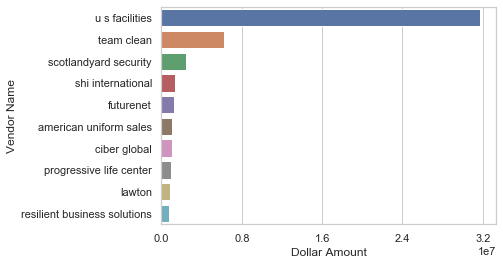

In [56]:
sns.set(style="whitegrid")
ax = sns.barplot(x="AMT", y="VEND_NAME", data=top10_vendors_amt)
ax.set(xlabel='Dollar Amount', ylabel='Vendor Name')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()

### Top 10 Departments by dollar amount

In [57]:
# get dept title from city payments data
city_payments = pd.read_excel(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\analysis\data\payments\city_payments_detailed_2017.xlsx')

In [58]:
simple_cp = city_payments[['dept', 'department_title']]

In [59]:
simple_cp = simple_cp.groupby(['dept', 'department_title']).size().to_frame('N').reset_index()

In [60]:
data = data.merge(simple_cp, how='left', left_on='DEPT_y', right_on='dept').drop(['dept'], axis=1)

In [62]:
dept_amt = data.groupby('department_title')['AMT_y'].sum().to_frame('AMT').reset_index()

In [63]:
top10_dept_amt = dept_amt.sort_values(by='AMT', ascending=False)[:10]

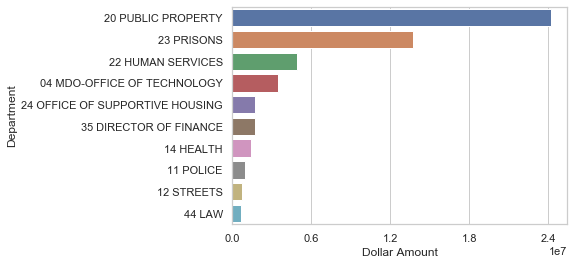

In [65]:
sns.set(style="whitegrid")
ax = sns.barplot(x="AMT", y="department_title", data=top10_dept_amt)
ax.set(xlabel='Dollar Amount', ylabel='Department')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()

## Company in West Powelton
West Powelton has much more dollar amounts than others in matched data, and there is only one company there. What is that company?

In [70]:
joined.columns

Index(['company_name', 'dba_name', 'owner_first', 'owner_last', 'location',
       'location_city', 'location_state', 'zip_code', 'mailing_address',
       'mailing_city', 'mailing_state', 'mailing_zip', 'certification_type',
       'capability', 'local', 'out_of_state', 'location_standard', 'lat',
       'lng', 'match_probability', 'right_index', 'DR_ACCT_x', 'CR_ACCT_x',
       'CURR_PRIOR_FLAG_x', 'POSTED_DATE_x', 'DEPT_x', 'SEC_FD_x', 'INDEX_x',
       'PROGRAM_CD_x', 'MAJ_CLASS_x', 'CLASS_x', 'DOC_NUM_x', 'TRANS_DESC_x',
       'DOC_REF_NUM_x', 'VEND_NAME', 'VEND_NUM_x', 'AMT_x', 'DOC_NUM4_x',
       'DOC_REF4_x', 'DR_ACCT_y', 'CR_ACCT_y', 'CURR_PRIOR_FLAG_y',
       'POSTED_DATE_y', 'DEPT_y', 'SEC_FD_y', 'INDEX_y', 'PROGRAM_CD_y',
       'MAJ_CLASS_y', 'CLASS_y', 'DOC_NUM_y', 'TRANS_DESC_y', 'DOC_REF_NUM_y',
       'VEND_NUM_y', 'AMT_y', 'DOC_NUM4_y', 'DOC_REF4_y', 'geometry',
       'index_right', 'ZillowName'],
      dtype='object')

In [71]:
joined.loc[joined['ZillowName'] == 'West Powelton']

,company_name,dba_name,owner_first,owner_last,location,location_city,location_state,zip_code,mailing_address,mailing_city,...,DOC_NUM_y,TRANS_DESC_y,DOC_REF_NUM_y,VEND_NUM_y,AMT_y,DOC_NUM4_y,DOC_REF4_y,geometry,index_right,ZillowName
4895,u s facilities,NaN,Jim,Dorris,"30 N. 41st Street, Suite 400",Philadelphia,PA,19104,"30 N. 41st Street, Suite 400",Philadelphia,...,PVMD1900831901,*2461043* SERVICE RENDERED SEPT 26 2018,MDXX1900102001,233035879 01,854.83,PVMD,MDXX,POINT (-75.20549 39.95852),145,West Powelton
4896,u s facilities,NaN,Jim,Dorris,"30 N. 41st Street, Suite 400",Philadelphia,PA,19104,"30 N. 41st Street, Suite 400",Philadelphia,...,PVMD1901233801,*2461095* SERVICE RENDERED OCT 2018,MDXX1800059301,233035879 01,16350.00,PVMD,MDXX,POINT (-75.20549 39.95852),145,West Powelton
4897,u s facilities,NaN,Jim,Dorris,"30 N. 41st Street, Suite 400",Philadelphia,PA,19104,"30 N. 41st Street, Suite 400",Philadelphia,...,PVMD1900116801,*246958*,MDXX1800128001,233035879 01,2846.64,PVMD,MDXX,POINT (-75.20549 39.95852),145,West Powelton
4898,u s facilities,NaN,Jim,Dorris,"30 N. 41st Street, Suite 400",Philadelphia,PA,19104,"30 N. 41st Street, Suite 400",Philadelphia,...,PVMD1900163701,*246966* MAY18 BUILD 6 NEW OFFICES,MDXX1800039401,233035879 01,74261.70,PVMD,MDXX,POINT (-75.20549 39.95852),145,West Powelton
4899,u s facilities,NaN,Jim,Dorris,"30 N. 41st Street, Suite 400",Philadelphia,PA,19104,"30 N. 41st Street, Suite 400",Philadelphia,...,PVMD1900163601,*246962* MAY18 OPB ADDITIIONAL PAINTING 11TH FLR,MDXX1800039401,233035879 01,2158.20,PVMD,MDXX,POINT (-75.20549 39.95852),145,West Powelton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,u s facilities,NaN,Jim,Dorris,"30 N. 41st Street, Suite 400",Philadelphia,PA,19104,"30 N. 41st Street, Suite 400",Philadelphia,...,PVMD1900038412,#245332#JAN18 SECURITY,MDXX1800044106,233035879 01,17548.42,PVMD,MDXX,POINT (-75.20549 39.95852),145,West Powelton
5388,u s facilities,NaN,Jim,Dorris,"30 N. 41st Street, Suite 400",Philadelphia,PA,19104,"30 N. 41st Street, Suite 400",Philadelphia,...,PVMD1900038406,#245325#DEC17 SECURITY,MDXX1800044106,233035879 01,21726.60,PVMD,MDXX,POINT (-75.20549 39.95852),145,West Powelton
5389,u s facilities,NaN,Jim,Dorris,"30 N. 41st Street, Suite 400",Philadelphia,PA,19104,"30 N. 41st Street, Suite 400",Philadelphia,...,PVMD1900038612,#245355#APR18 SECURITY,MDXX1800044106,233035879 01,17548.42,PVMD,MDXX,POINT (-75.20549 39.95852),145,West Powelton
5390,u s facilities,NaN,Jim,Dorris,"30 N. 41st Street, Suite 400",Philadelphia,PA,19104,"30 N. 41st Street, Suite 400",Philadelphia,...,PVMD1900038606,#245349#MAR18 SECURITY,MDXX1800044106,233035879 01,21935.52,PVMD,MDXX,POINT (-75.20549 39.95852),145,West Powelton


In [72]:
joined.loc[joined['ZillowName'] == 'Navy Yard']

,company_name,dba_name,owner_first,owner_last,location,location_city,location_state,zip_code,mailing_address,mailing_city,...,DOC_NUM_y,TRANS_DESC_y,DOC_REF_NUM_y,VEND_NUM_y,AMT_y,DOC_NUM4_y,DOC_REF4_y,geometry,index_right,ZillowName
4516,team clean,NaN,Donna,Allie,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,PA,19112,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,...,VCXX1901307201,*25651* ROOM 404,POXX1910279701,232570162 01,146.88,VCXX,POXX,POINT (-75.17620 39.89279),88,Navy Yard
4517,team clean,NaN,Donna,Allie,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,PA,19112,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,...,VCXX1901307301,*25705* 492 494,POXX1910279701,232570162 01,146.88,VCXX,POXX,POINT (-75.17620 39.89279),88,Navy Yard
4518,team clean,NaN,Donna,Allie,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,PA,19112,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,...,VCXX1901640801,*25708* ROOMS 564-578-567,POXX1910279701,232570162 01,440.64,VCXX,POXX,POINT (-75.17620 39.89279),88,Navy Yard
4519,team clean,NaN,Donna,Allie,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,PA,19112,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,...,VCXX1901938601,*25729* ROOM 595-597,POXX1910279701,232570162 01,146.88,VCXX,POXX,POINT (-75.17620 39.89279),88,Navy Yard
4520,team clean,NaN,Donna,Allie,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,PA,19112,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,...,VCXX1902394401,"*25788* 592,594,595,597",POXX1910279701,232570162 01,220.32,VCXX,POXX,POINT (-75.17620 39.89279),88,Navy Yard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,team clean,NaN,Donna,Allie,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,PA,19112,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,...,VCXX1900067001,*25480* MAY18 SERVICE,POXX1812337201,232570162 01,237391.97,VCXX,POXX,POINT (-75.17620 39.89279),88,Navy Yard
4763,team clean,NaN,Donna,Allie,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,PA,19112,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,...,VCXX1900511401,*25482* MAY18 SERVICE,POXX1812354701,232570162 01,142969.05,VCXX,POXX,POINT (-75.17620 39.89279),88,Navy Yard
4764,team clean,NaN,Donna,Allie,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,PA,19112,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,...,VCXX1900512301,*25595* JUNE17 SERVICE,POXX1812354801,232570162 01,61890.91,VCXX,POXX,POINT (-75.17620 39.89279),88,Navy Yard
4765,team clean,NaN,Donna,Allie,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,PA,19112,"4747 South Broad Street, Building 101, Suite 110",Philadelphia,...,VCXX1900512401,*25594* JUNE18 SERVICE,POXX1812354901,232570162 01,259074.95,VCXX,POXX,POINT (-75.17620 39.89279),88,Navy Yard


## Including Philly MSA

In [189]:
msa = gpd.read_file(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\mwdsbe\data\philly_cbsa')

In [190]:
msa

,STATEFP10,CSAFP10,CBSAFP10,GEOID10,NAME10,NAMELSAD10,LSAD10,MEMI10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,42,564,23900,4223900,"Gettysburg, PA","Gettysburg, PA Micro Area",M2,2,G3110,1343342705,8081576,+39.8694707,-077.2177296,N,"POLYGON ((-77.46596 39.85976, -77.46596 39.859..."
1,42,558,30820,4230820,"Lock Haven, PA","Lock Haven, PA Micro Area",M2,2,G3110,2299868539,23178658,+41.2453009,-077.6491409,N,"POLYGON ((-78.05358 41.27372, -78.05353 41.273..."
2,42,None,10900,4210900,"Allentown-Bethlehem-Easton, PA-NJ","Allentown-Bethlehem-Easton, PA-NJ Metro Area",M1,1,G3110,3763809464,58700377,+40.7893067,-075.3983288,Y,"POLYGON ((-75.99286 40.91464, -75.99274 40.914..."
3,42,None,47620,4247620,"Warren, PA","Warren, PA Micro Area",M2,2,G3110,2289898600,37368011,+41.8436691,-079.3131731,N,"POLYGON ((-79.29221 41.62585, -79.29448 41.625..."
4,42,428,39740,4239740,"Reading, PA","Reading, PA Metro Area",M1,1,G3110,2218341544,23955804,+40.4139565,-075.9268598,N,"POLYGON ((-75.67406 40.53842, -75.66964 40.535..."
5,42,None,27780,4227780,"Johnstown, PA","Johnstown, PA Metro Area",M1,1,G3110,1782819861,13680552,+40.4941269,-078.7152843,N,"POLYGON ((-79.03391 40.31649, -79.03358 40.316..."
6,42,None,32740,4232740,"Meadville, PA","Meadville, PA Micro Area",M2,2,G3110,2621839209,65310694,+41.6868399,-080.1078113,N,"POLYGON ((-79.76203 41.85083, -79.76175 41.850..."
7,42,None,20700,4220700,"East Stroudsburg, PA","East Stroudsburg, PA Micro Area",M2,2,G3110,1575452175,23238961,+41.0562332,-075.3290369,N,"POLYGON ((-75.13843 41.21863, -75.14007 41.212..."
8,42,564,49620,4249620,"York-Hanover, PA","York-Hanover, PA Metro Area",M1,1,G3110,2341819225,16941352,+39.9218390,-076.7284464,N,"POLYGON ((-76.51664 40.01758, -76.51529 40.016..."
9,42,430,38300,4238300,"Pittsburgh, PA","Pittsburgh, PA Metro Area",M1,1,G3110,13678960186,157922975,+40.4343484,-079.8280537,N,"POLYGON ((-79.99801 39.98332, -79.99832 39.983..."


In [191]:
msa = gpd.GeoDataFrame(msa, geometry='geometry', crs={"init": "epsg:4326"})

In [192]:
philly_msa = msa.loc[msa['NAMELSAD10'].str.contains('Philadelphia')]

In [193]:
philly_msa

,STATEFP10,CSAFP10,CBSAFP10,GEOID10,NAME10,NAMELSAD10,LSAD10,MEMI10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
10,42,428,37980,4237980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",M1,1,G3110,11919387230,694091914,+39.8954398,-075.3119256,Y,"POLYGON ((-76.13662 39.72542, -76.13645 39.725..."


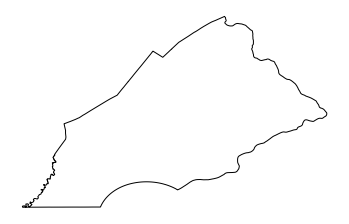

In [194]:
ax = philly_msa.plot(facecolor='none', edgecolor='black')
ax.set_axis_off()
ax.set_aspect("equal")

In [195]:
joined = gpd.sjoin(data_gdf, philly_msa, op='within', how='left')

In [196]:
len(joined)

2720

In [197]:
joined

,company_name,dba_name,owner_first,owner_last,location,location_city,location_state,zip_code,mailing_address,mailing_city,...,NAME10,NAMELSAD10,LSAD10,MEMI10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10
17,a a court reporting,andrea st john,Andrea,St. John,"303 Chestnut Street, Second Floor",Philadelphia,PA,19106,"P.O. Box 74, Suite 4",Moorestown,...,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",M1,1,G3110,11919387230,694091914,+39.8954398,-075.3119256,Y
19,a a court reporting,andrea st john,Andrea,St. John,"303 Chestnut Street, Second Floor",Philadelphia,PA,19106,"P.O. Box 74, Suite 4",Moorestown,...,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",M1,1,G3110,11919387230,694091914,+39.8954398,-075.3119256,Y
21,a a court reporting,andrea st john,Andrea,St. John,"303 Chestnut Street, Second Floor",Philadelphia,PA,19106,"P.O. Box 74, Suite 4",Moorestown,...,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",M1,1,G3110,11919387230,694091914,+39.8954398,-075.3119256,Y
23,a a court reporting,andrea st john,Andrea,St. John,"303 Chestnut Street, Second Floor",Philadelphia,PA,19106,"P.O. Box 74, Suite 4",Moorestown,...,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",M1,1,G3110,11919387230,694091914,+39.8954398,-075.3119256,Y
25,a a court reporting,andrea st john,Andrea,St. John,"303 Chestnut Street, Second Floor",Philadelphia,PA,19106,"P.O. Box 74, Suite 4",Moorestown,...,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",M1,1,G3110,11919387230,694091914,+39.8954398,-075.3119256,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,zanaras reporting video,NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103,"1845 WALNUT STREET, Suite 938",Philadelphia,...,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",M1,1,G3110,11919387230,694091914,+39.8954398,-075.3119256,Y
5661,zanaras reporting video,NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103,"1845 WALNUT STREET, Suite 938",Philadelphia,...,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",M1,1,G3110,11919387230,694091914,+39.8954398,-075.3119256,Y
5662,zanaras reporting video,NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103,"1845 WALNUT STREET, Suite 938",Philadelphia,...,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",M1,1,G3110,11919387230,694091914,+39.8954398,-075.3119256,Y
5663,zanaras reporting video,NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103,"1845 WALNUT STREET, Suite 938",Philadelphia,...,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",M1,1,G3110,11919387230,694091914,+39.8954398,-075.3119256,Y


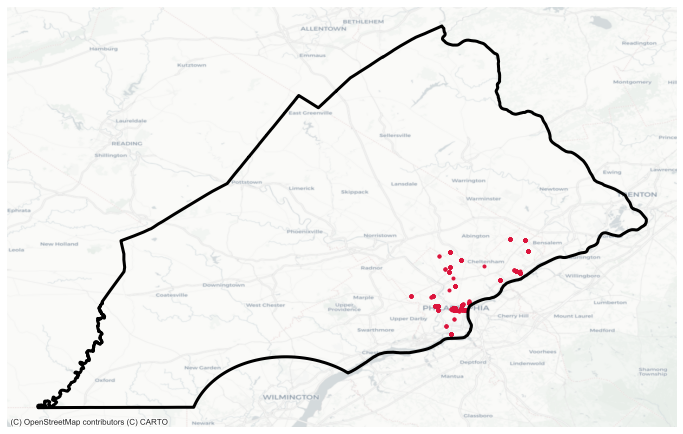

In [200]:
import contextily as ctx

# create the axes
fig, ax = plt.subplots(figsize=(12, 12))

# plot a random sample of potholes
data_gdf.plot(ax=ax, marker='.', color='crimson') # NEW: use the sample() function

# add the city limits
philly_msa.to_crs(data_gdf.crs).plot(ax=ax, edgecolor='black', linewidth=3, facecolor='none')

# NEW: plot the basemap underneath
ctx.add_basemap(ax=ax, crs=data_gdf.crs, url=ctx.providers.CartoDB.Positron)

# remove axis lines
ax.set_axis_off()

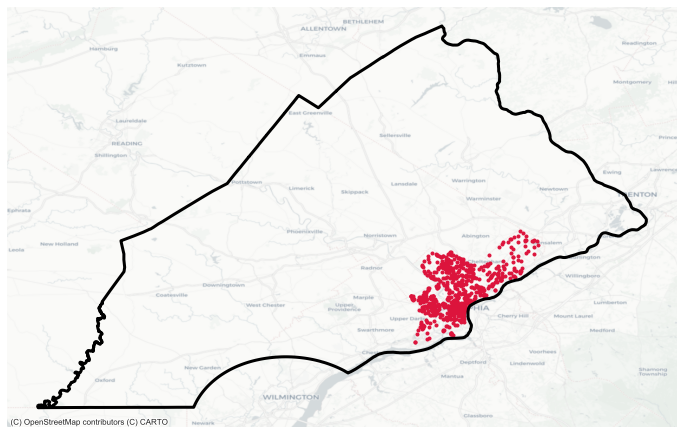

In [201]:
import contextily as ctx

registry = gpd.GeoDataFrame(registry, geometry='geometry', crs={"init": "epsg:4326"})

# create the axes
fig, ax = plt.subplots(figsize=(12, 12))

# plot a random sample of potholes
registry.plot(ax=ax, marker='.', color='crimson') # NEW: use the sample() function

# add the city limits
philly_msa.to_crs(registry.crs).plot(ax=ax, edgecolor='black', linewidth=3, facecolor='none')

# NEW: plot the basemap underneath
ctx.add_basemap(ax=ax, crs=registry.crs, url=ctx.providers.CartoDB.Positron)

# remove axis lines
ax.set_axis_off()